# Modèle SARIMAX

Avant d'entrer dans l'explication du modèle SARIMAX, il est crucial d'expliquer d'abord le modèle ARIMA.

Le modèle ARIMA (AutoRegressive Integrated Moving Average) est une méthode couramment utilisée pour modéliser et prévoir les séries temporelles. Il combine les composantes de l'autorégression (AR) et de la moyenne mobile (MA) avec une différenciation (I) pour prendre en compte les tendances et les comportements saisonniers dans les données.

**1. Composantes du modèle ARIMA**

- **AR (Autorégression)** : L'AR fait référence à la régression linéaire des valeurs actuelles sur les valeurs précédentes de la série temporelle. Il capture les effets de dépendance linéaire à partir des valeurs passées.

- **MA (Moyenne mobile)** : Le MA utilise la moyenne mobile des erreurs précédentes pour modéliser la relation entre les résidus et les observations actuelles de la série temporelle. Il capture les effets de dépendance entre les résidus.

- **I (Différenciation)** : La différenciation est utilisée pour rendre les données stationnaires en supprimant les tendances et les comportements saisonniers. Elle consiste à prendre la différence entre les observations consécutives jusqu'à obtenir une série stationnaire.

**2. Ordres**

Le modèle ARIMA est défini par trois ordres : **p, d et q.**

- **p (Ordre AR)** : L'ordre AR spécifie le nombre de termes autorégressifs à inclure dans le modèle. ***Il indique combien de valeurs passées sont utilisées pour prédire la valeur actuelle***.

- **d (Ordre de différenciation)** : L'ordre de différenciation ***indique combien de fois la série doit être différenciée pour rendre les données stationnaires***.

- **q (Ordre MA)** : L'ordre MA spécifie le nombre de termes de la moyenne mobile à inclure dans le modèle. ***Il indique combien de résidus passés sont utilisés pour prédire l'observation actuelle***.




Contrairement à la Méthode ARIMA qui ne considère pas la Saisonnalité et les variables exogènes, le modèle **SARIMAX** prend en considération ces éléments.

SARIMAX intègre des composantes saisonnières pour modéliser des motifs répétitifs sur des périodes fixe comme, par exemple, chaque mois, chaque trimestre.

**NB** : ***Aussi le modèle SARIMAX est une extension du SARIMA(Saisonnalité), à son tour une extension de ARIMA***

## Méthodologie de Box-Jenkins

La méthodologie de Box-Jenkins est une approche couramment utilisée pour modéliser et prévoir les séries temporelles.

Cette méthodologie comprends trois étapes suivantes :

**1. Identification du modèle** :

- Analyser les données, détecter les tendances ou une saisonnalité;

- Rendre les données stationnaires en appliquant la différenciation;

- Déterminer les ordres p, d et q, à l'aide des graphique ACF (fonction d'autocorrélation) et PACF (fonction autocorrélation partielle)

**2. Estimation du modèle :** MCO(OLS) par exemple pour estimer les paramètres du modèle.

**3. Vérification du modèle**

- Diagnostic du modèle :  vérifier que les résidus du modèle ARIMA sont "bruit blanc" (absence de corrélation significative)

- Ajustement du modèle : si le modèle ne satisfait pas les critères du bruit blanc alors, il faut modifier les valeurs de p, d et q. Puis reprendre les étapes précédentes.

- Validation : effectue des prédictions sur les données de validation en utilisant des métriques comme RMSE(erreur quadratique moyenne) ou AIC (critère d'information AKAIKE)

La méthodologie de Box-Jenkins est itérative, ce qui signifie que les étapes d'identification, d'estimation et de vérification peuvent être répétées plusieurs fois pour améliorer le modèle. L'objectif est de trouver le meilleur modèle ARIMA qui capture les motifs et les caractéristiques importantes de la série temporelle, et qui peut être utilisé pour effectuer des prédictions précises.



### Librairies de base

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Exploration du dataset

In [27]:
chemin_fichier="E:\Formation_Data_Analystic\Statistique\sda_stat_AQI\London_Air_Quality.csv"
df_initial=pd.read_csv(chemin_fichier)

In [3]:
df_initial.head(3)

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,162.0,NaN,4.7,1.0,65.0,3.5,7.3,9.070833
1,2024-01-01 01:00:00+00:00,163.0,NaN,4.6,1.2,63.0,3.5,6.0,25.200000
2,2024-01-01 02:00:00+00:00,157.0,NaN,4.3,1.1,64.0,3.3,5.9,25.599998


In [5]:
df_initial.shape

(8784, 9)

In [28]:
# Créer un nouveau df et recuperer que les colonnes Date et AQI

df = df_initial[['Date', 'AQI', 'PM2.5']]

In [7]:
df.head(3)

,Date,AQI,PM2.5
0,2024-01-01 00:00:00+00:00,9.070833,3.5
1,2024-01-01 01:00:00+00:00,25.200000,3.5
2,2024-01-01 02:00:00+00:00,25.599998,3.3


## Présentation de la problématique

**Description de la base de données la qualité de l'air (AQI)**

La base de données AQI regroupe les valeurs sur la qualité de l'air de la ville de Londre en 2024. Elle sera l'objet d'une étude en série temporelle pour comprendre la variation de l'AQI influence significativement par PM2.5 en fonction du temps.


La base de données AQI contient les colonnes suivantes :

- **Date** : La date (jour, mois et année) de chaque observation.
- **AQI** : la concentration de l'air.


In [8]:
# Information sur la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8784 non-null   object 
 1   AQI     8784 non-null   float64
 2   PM2.5   8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 206.0+ KB


In [ ]:
# Conversion de la date en datetime
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

In [10]:
# Verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    8784 non-null   datetime64[ns, UTC]
 1   AQI     8784 non-null   float64            
 2   PM2.5   8784 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 206.0 KB


In [ ]:
df['Date'] = df['Date'].dt.tz_localize(None)

In [31]:
# Mettre la date en index de la table
df.set_index('Date',inplace=True)
df.head(3)

,AQI,PM2.5
Date,,
2024-01-01 00:00:00,9.070833,3.5
2024-01-01 01:00:00,25.200000,3.5
2024-01-01 02:00:00,25.599998,3.3


In [32]:
# Vérification des valeurs manquante
df.isnull().sum()

AQI      0
PM2.5    0
dtype: int64

In [16]:
def setup_plot():
    sns.set_theme(style="whitegrid")
    return ["#004aad", "#2bb4d4", "#2e2e2e", "#5ce1e6"]

In [17]:

#Chargement de la plalette de couleur
colors = setup_plot()

### AQI et PM2.5

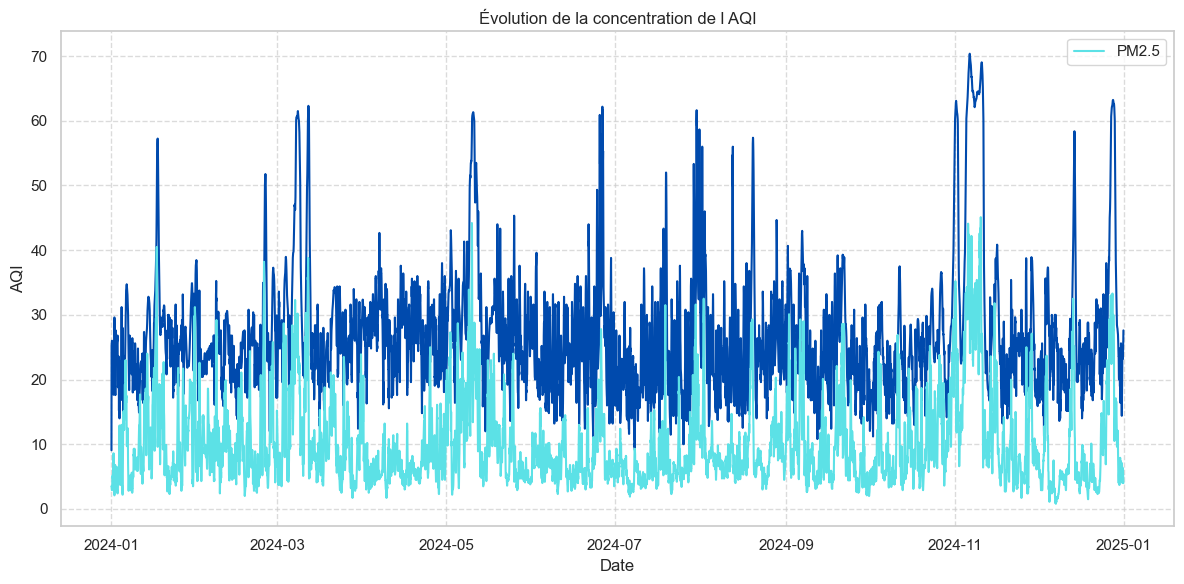

In [33]:
# Visualisation des séries temporelles AQI et PM2.5
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], color=colors[0], linewidth=1.5)
plt.plot(df['PM2.5'], label='PM2.5', color=colors[3], linewidth=1.5)
plt.title('Évolution de la concentration de l AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

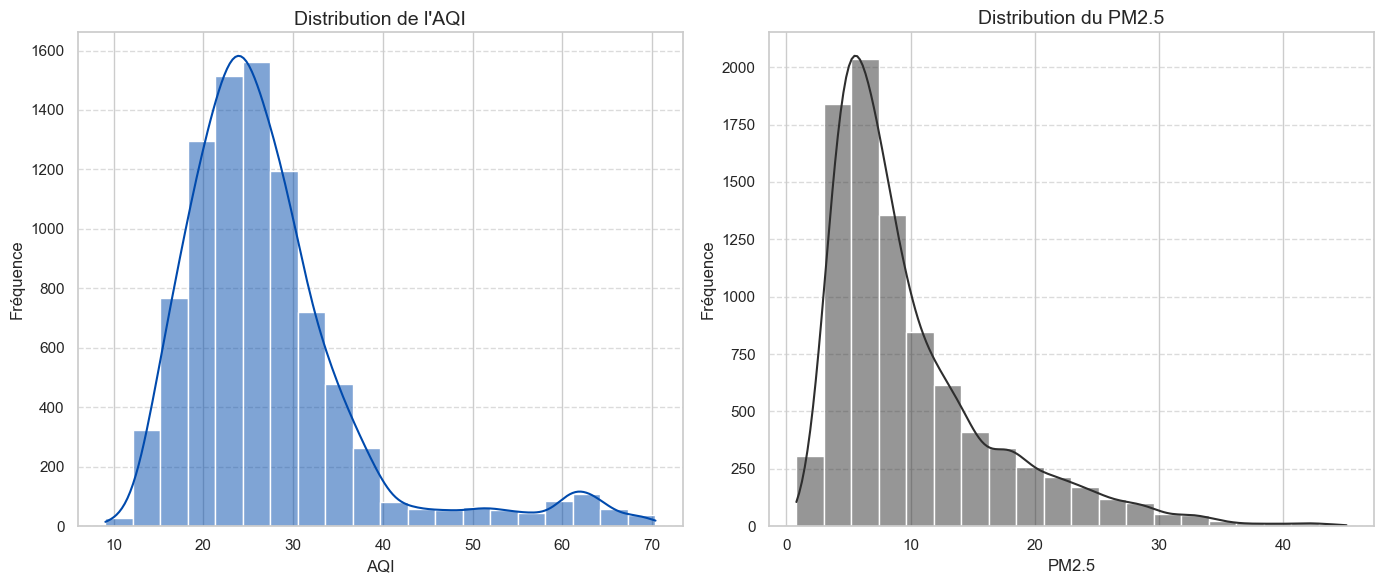

In [35]:


# --- Distribution des valeurs (Histogrammes) ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, premier graphique
sns.histplot(df['AQI'], kde=True, bins=20, color=colors[0])
plt.title('Distribution de l\'AQI', fontsize=14)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, deuxième graphique
sns.histplot(df['PM2.5'], kde=True, bins=20, color=colors[2])
plt.title('Distribution du PM2.5', fontsize=14)
plt.xlabel('PM2.5', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [36]:
# Statistiques descriptives

print("\nStatistiques descriptives pour l'AQI et le PM2.5 :")
print(df[['AQI', 'PM2.5']].describe())


Statistiques descriptives pour l'AQI et le PM2.5 :
               AQI        PM2.5
count  8784.000000  8784.000000
mean     27.097212     9.985178
std       9.971780     6.763177
min       9.070833     0.800000
25%      20.800000     5.300000
50%      25.200000     7.800000
75%      30.341665    12.500000
max      70.370010    45.100000


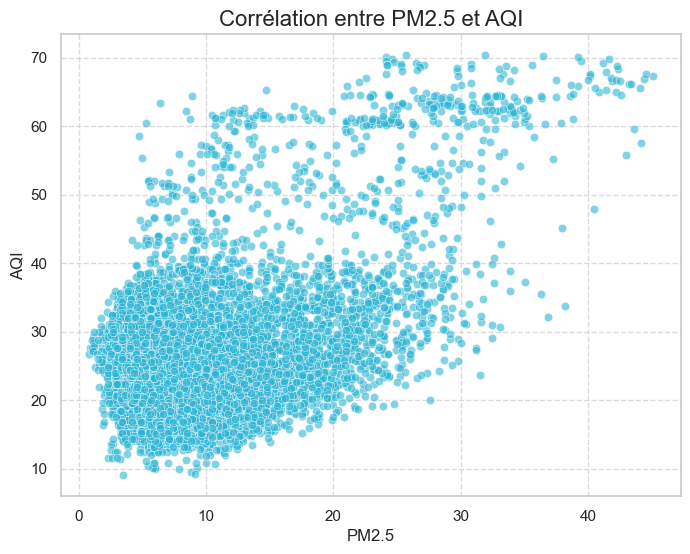


Coefficient de corrélation entre AQI et PM2.5 : 0.530


In [37]:
# Corrélation entre AQI et PM2.5 (Nuage de points et coefficient)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PM2.5'], y=df['AQI'], alpha=0.6, color=colors[1])
plt.title('Corrélation entre PM2.5 et AQI', fontsize=16)
plt.xlabel('PM2.5', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

correlation = df['AQI'].corr(df['PM2.5'])
print(f"\nCoefficient de corrélation entre AQI et PM2.5 : {correlation:.3f}")

In [38]:
df_initial.columns

Index(['Date', 'CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI'], dtype='object')

On constate une relation linéaire entre PM2.5 et AQI. Lorsque PM2.5 augmente, l'AQI a tendance à augmenter. De plus, il y 'a une forte corrélation positive, qui entraine que ces deux variables évoluent dans la même direction.

In [67]:
# --- Rééchantillonnage vers une fréquence journalière ---

# Option 1: Moyenne journalière
df = df.resample('D').mean()

In [68]:
df.shape

(366, 2)

## Méthodologie Jenkins Box

### Etape 1 : Identification du modèle

#### a) Analyse des données :  

On décompose la série temporelle dans le but d'identifier les trois composantes : 
- La Tendance,
- La Saisonnalité
- Les Résidus

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Modèle additif**

**Additif** : Si l'amplitude de la saisonnalité ne change pas avec le niveau de la série. La somme de la Tendance (T), Saisonnalité (S) et Résidus (R)


In [ ]:
# Period = 24, par heure (horaire)
# periode = 12, par mois (mensuel)
# Periode = 7, par journalière (hedmadaire)
decomposition_aqi = seasonal_decompose(df['AQI'], model='additive', period=7)

In [64]:
trend = decomposition_aqi.trend
seasonal = decomposition_aqi.seasonal
residual = decomposition_aqi.resid

In [69]:
print(trend)

Date
2024-01-01          NaN
2024-01-02          NaN
2024-01-03          NaN
2024-01-04    23.588576
2024-01-05    23.791726
                ...    
2024-12-27    36.917957
2024-12-28    36.689594
2024-12-29          NaN
2024-12-30          NaN
2024-12-31          NaN
Freq: D, Name: trend, Length: 366, dtype: float64


##### AQI

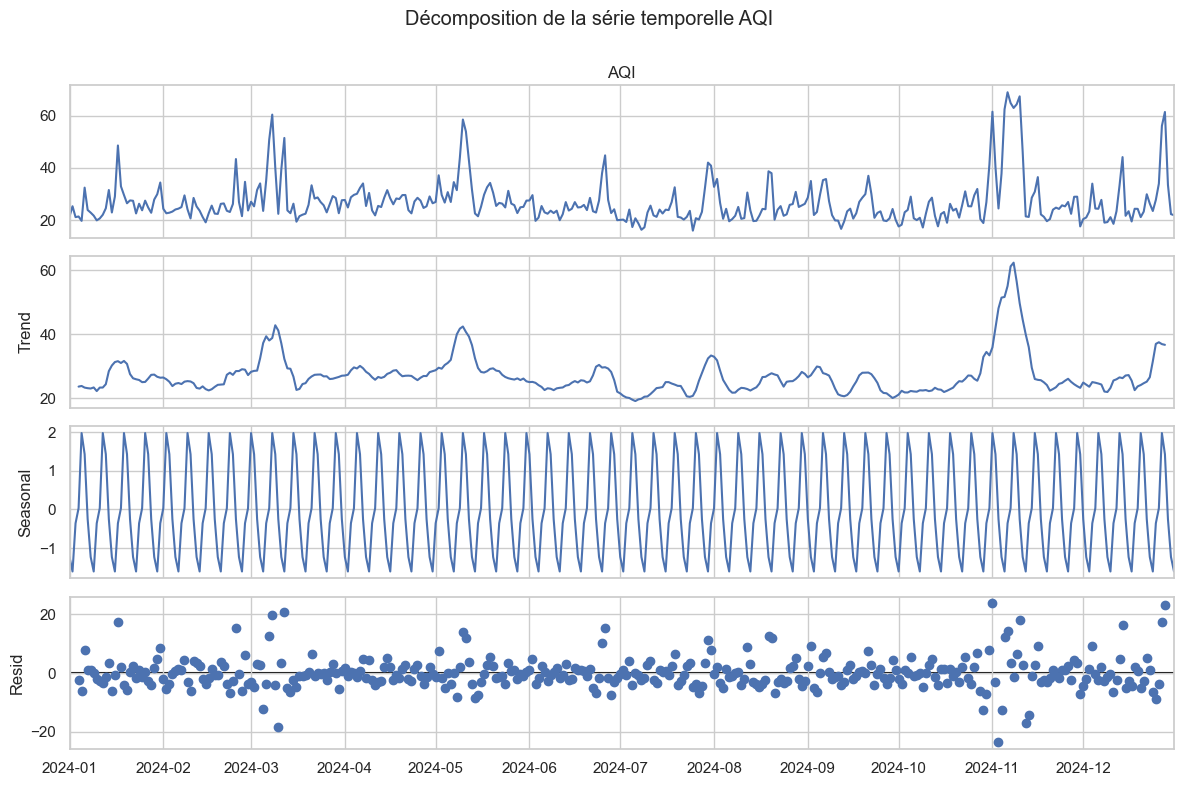

In [66]:
# Visualisation de la décomposition
fig = decomposition_aqi.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Décomposition de la série temporelle AQI ') 
plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

##### PM2.5

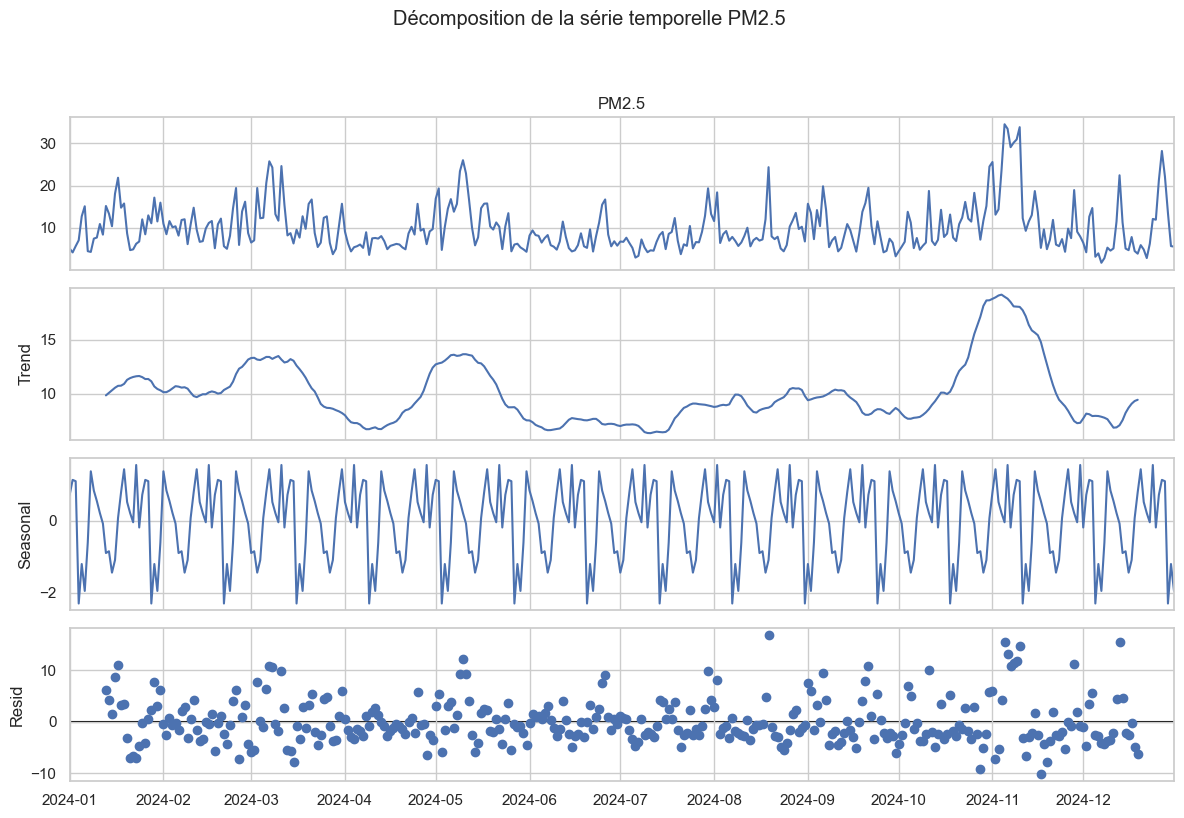

In [70]:
decomposition_pm25 = seasonal_decompose(df['PM2.5'], model='additive', period=24)
fig_pm25 = decomposition_pm25.plot()
fig_pm25.set_size_inches(12, 8)
fig_pm25.suptitle('Décomposition de la série temporelle PM2.5 ', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Conclusion: On constate la série AQI présente une tendance et une saisonnalité

### Courbe ACF et PACF sans differencier

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

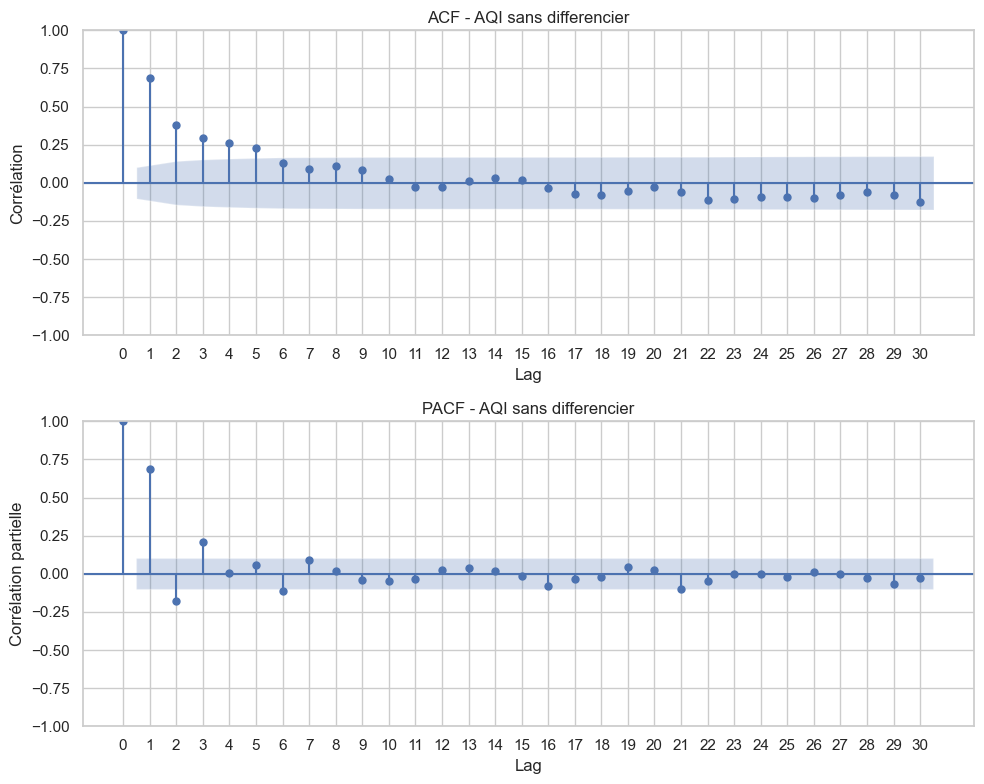

In [72]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(df['AQI'], lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - AQI sans differencier')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(df['AQI'], lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - AQI sans differencier')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

#### b) Test Stationnarité (Différenciation)

Le but est de rendre la série stationnaire c'est à dire supprimer les tendances et la saisonnalité.

Le graphique présente nous montre que la série n'est pas stationnaire car la moyenne n'est constante.

Pour la rendre la rendre stationnaire, nous allons utiliser la fonction **diff**.
Cette méthode est utilisée pour calculer la différence entre un élément et un élément dans la période précédente (ou une période spécifique)

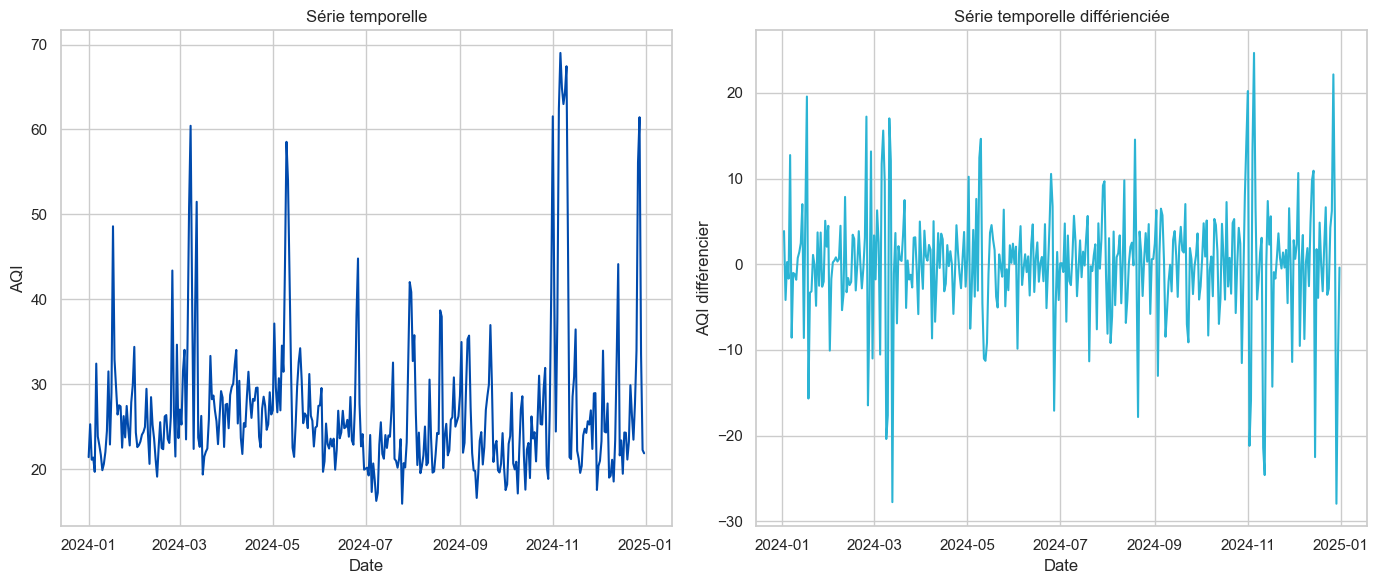

In [80]:
# Différenciation pour rendre la série stationnaire
differenced = df['AQI'].diff().dropna()


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # 
plt.plot(df['AQI'], color=colors[0])
plt.title('Série temporelle')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)

plt.subplot(1, 2, 2) 
plt.plot(differenced, color=colors[1])
plt.title('Série temporelle différienciée')
plt.xlabel('Date')
plt.ylabel('AQI différencier')
plt.grid(True)


plt.tight_layout()
plt.show()

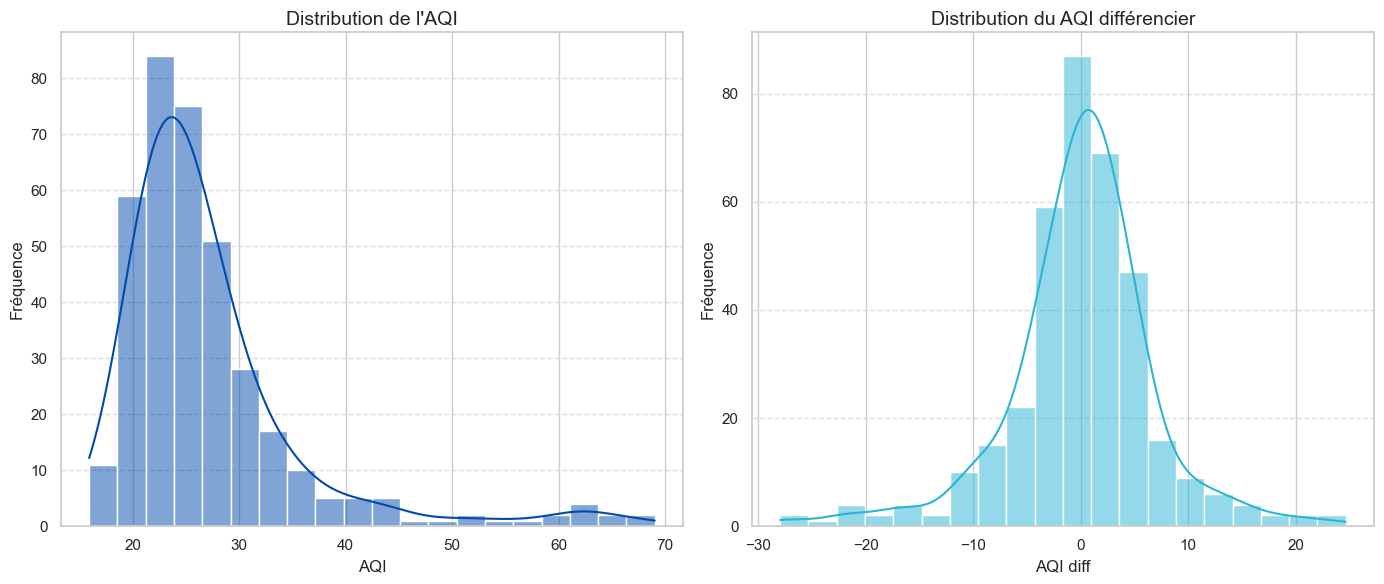

In [76]:
# --- Distribution des valeurs (Histogrammes) ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, premier graphique
sns.histplot(df['AQI'], kde=True, bins=20, color=colors[0])
plt.title('Distribution de l\'AQI', fontsize=14)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, deuxième graphique
sns.histplot(differenced, kde=True, bins=20, color=colors[1])
plt.title('Distribution du AQI différencier', fontsize=14)
plt.xlabel('AQI diff', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [77]:
differenced.describe()

count    365.000000
mean       0.001248
std        6.831562
min      -27.960137
25%       -2.932984
50%        0.434723
75%        3.447084
max       24.669099
Name: AQI, dtype: float64

**Observation** :  graphiquement, la série est stationnaire car la moyenne est constante autour de 0. Pour confirmer, nous allon tester utiliser le **test de AD-Fuller**

Hypothèse nulle est (H0) :  La série n'est pas stationnaire. Si p-value < 0.5 (seuil de base) alors **H0 est rejeté**

In [78]:
from statsmodels.tsa.stattools import adfuller

print("Résultats du Test de Dickey-Fuller Augmenté pour AQI")
adf_aqi = adfuller(differenced)

# Affichage des résultats
print(f'Statistique ADF: {adf_aqi[0]: .4f}')
print(f'P-value : {adf_aqi[1]: .4f}')

print('Valeurs critiques : ')
for key, value in adf_aqi[4].items():
    print(f' {key} : {value: .4f}')


# Interprétation de p-value
if adf_aqi[1] <=0.05:
    print("\nConclusion : La P-value est <= 0.05. Nous rejetons l'hypothèse nulle (H0).")
    print("La série AQI est probablement stationnaire")
else:
    print("\nConclusion : La P-value est > 0.05. Nous ne pouvons pas rejeter l'hypothèse nulle (H0).")
    print("La série AQI n'est probablement PAS stationnaire.")


Résultats du Test de Dickey-Fuller Augmenté pour AQI
Statistique ADF: -10.9717
P-value :  0.0000
Valeurs critiques : 
 1% : -3.4487
 5% : -2.8696
 10% : -2.5711

Conclusion : La P-value est <= 0.05. Nous rejetons l'hypothèse nulle (H0).
La série AQI est probablement stationnaire


### c) Identification des ordres :  p, d et q

Nous allons réaliser les fonctions Autocorrélation (ACF) et Autocorrélation partielle (PACF)

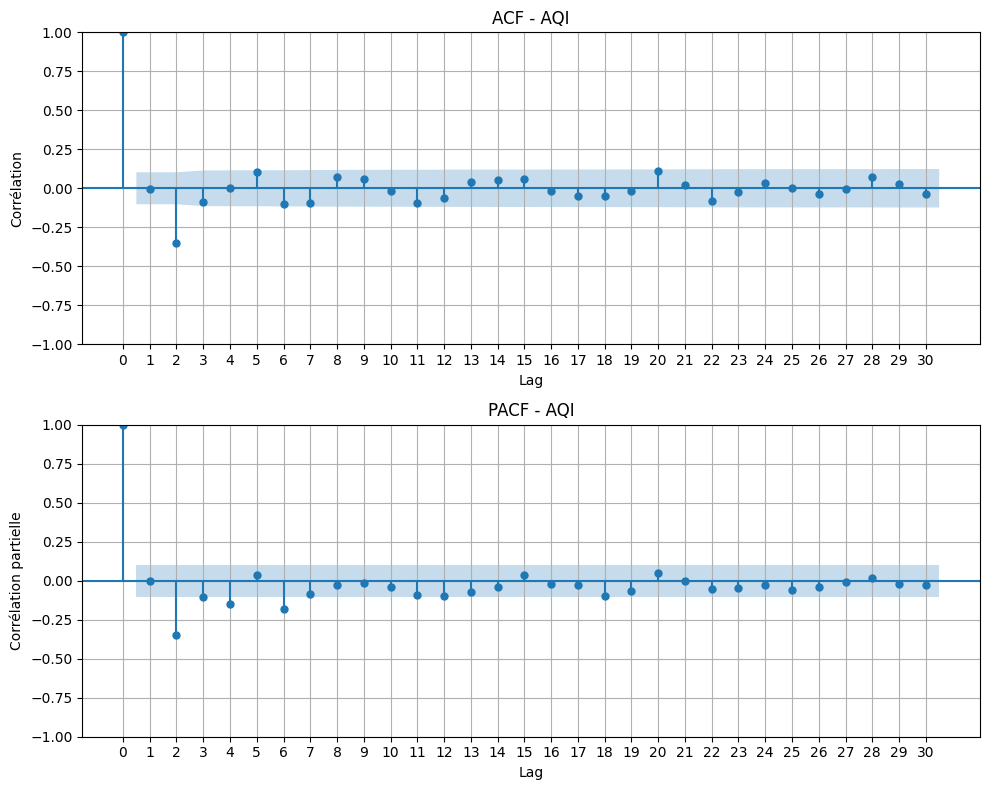

In [203]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - AQI')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - AQI')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

## Etape 2: Estimation du modèle

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

In [98]:
p = 3
d = 1
q = 1

In [99]:
P = 2
D = 1
Q = 2
s = 7

In [145]:
# Split des données en entraînement et test (par exemple, 80% entraînement, 20% test)
train_size = int(len(df) * 0.8)

train_aqi = df['AQI'].iloc[:train_size]
test_aqi =  df['AQI'].iloc[train_size:]

train_exog =  df[['PM2.5']].iloc[:train_size]
test_exog =  df[['PM2.5']].iloc[train_size:]


Tentative d'ajustement du modèle SARIMA(3, 1, 1)(2, 1, 2, 7) pour l'AQI...

Résumé du modèle SARIMAX pour l'AQI :
                                       SARIMAX Results                                        
Dep. Variable:                                    AQI   No. Observations:                  292
Model:             SARIMAX(3, 1, 1)x(2, 1, [1, 2], 7)   Log Likelihood                -785.540
Date:                                Fri, 18 Jul 2025   AIC                           1591.080
Time:                                        00:16:13   BIC                           1626.953
Sample:                                    01-01-2024   HQIC                          1605.490
                                         - 10-18-2024                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

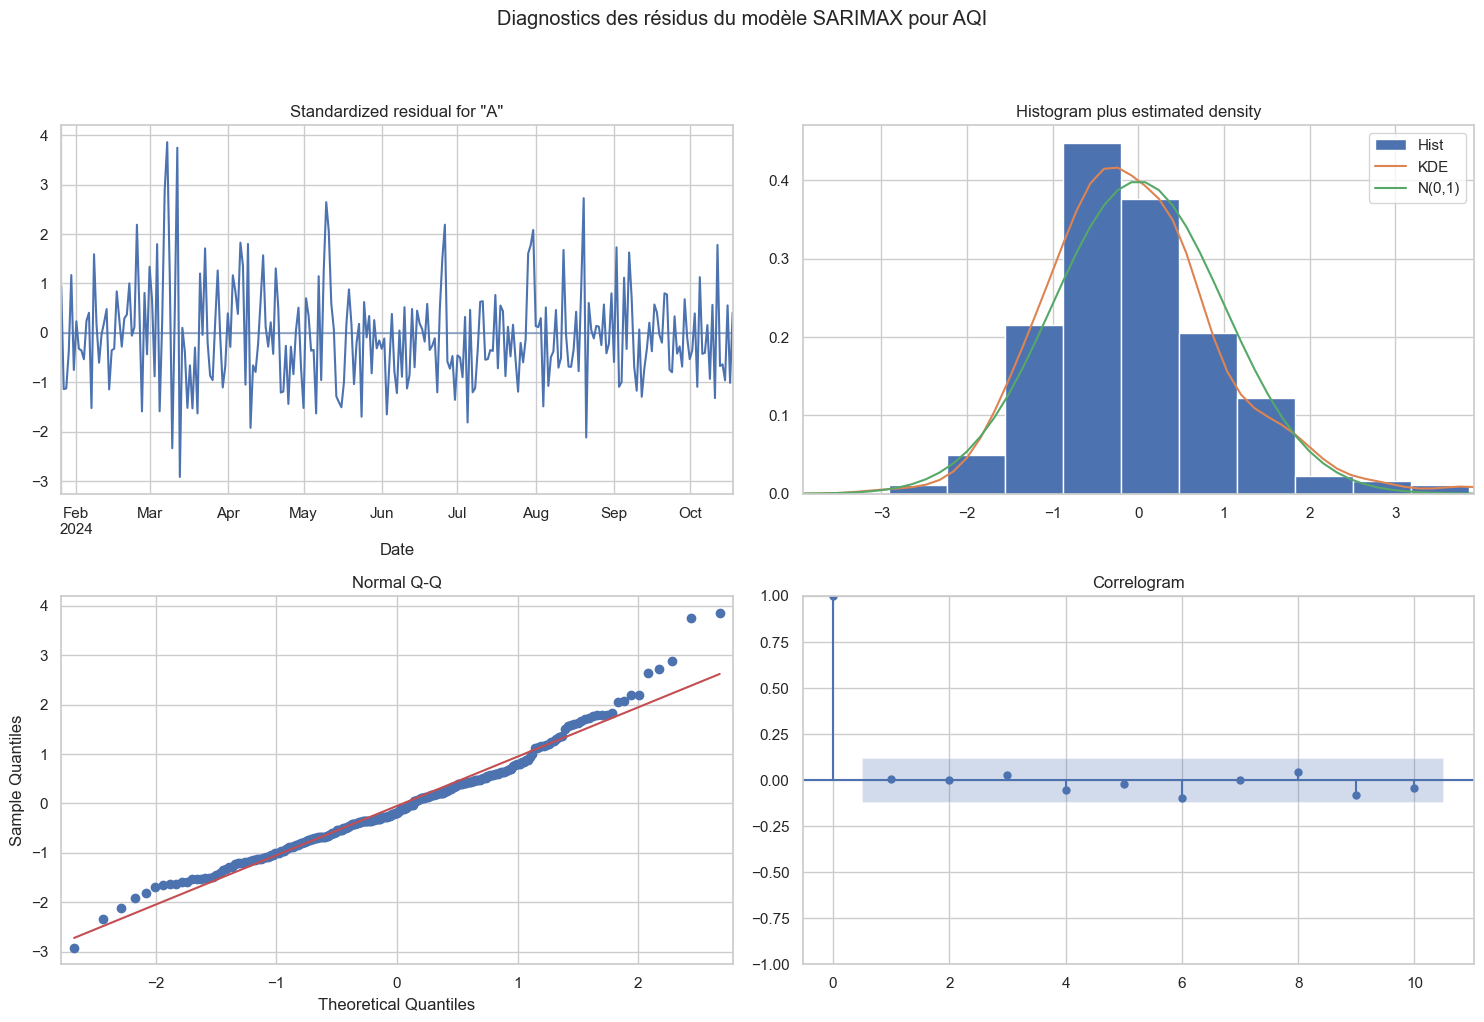


Test de Ljung-Box sur les résidus (Hypothèse Nulle : les résidus sont indépendants) :
      lb_stat  lb_pvalue
7    9.531573   0.216708
10  11.850809   0.295165
12  14.122211   0.292972
20  30.155118   0.067379
24  33.132662   0.101305
30  35.703685   0.217939


In [103]:
# Modèle SARIMAX pour AQI

order = (p, d, q)
seasonal_order = (P, D, Q, s)
print(f"\nTentative d'ajustement du modèle SARIMA{order}{seasonal_order} pour l'AQI...")
try:
    model_aqi = SARIMAX(train_aqi,
                        exog = train_exog,
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False, 
                        enforce_invertibility=False)
    results_aqi = model_aqi.fit(disp=False) # disp=False pour éviter l'affichage de chaque itération

    print("\nRésumé du modèle SARIMAX pour l'AQI :")
    print(results_aqi.summary())

    # --- 6.2 Analyse des résidus du modèle ---
    print("\nAnalyse des résidus :")
    results_aqi.plot_diagnostics(figsize=(15, 10))
    plt.suptitle('Diagnostics des résidus du modèle SARIMAX pour AQI', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    # Test de Ljung-Box sur les résidus pour l'autocorrélation
    print("\nTest de Ljung-Box sur les résidus (Hypothèse Nulle : les résidus sont indépendants) :")
    ljung_box = acorr_ljungbox(results_aqi.resid, lags=[7, 10, 12, 20, 24, 30], return_df=True)
    print(ljung_box)

except Exception as e:
    print(f"Une erreur est survenue lors de l'ajustement du modèle : {e}")
    print("Cela peut arriver si les ordres ne sont pas optimaux ou si les données sont trop courtes pour une période saisonnière.")
    print("Essayez de revoir les ordres ou d'augmenter la taille des données si possible.")



Le corrélogramme, nous montre que toutes les barres sont dans la barre confiance donc aucun point significatif alors il y'a "Bruit Blanc"

### Evaluation du modèle 

Le but est d'utiliser des métriques afin de valider les performances des prévisions du modèle

#### Prévision des valeurs futures

In [ ]:
future_periods = 7 # Prévoir pour les 7 prochains jours

# 2. Définir les indices de début et de fin pour la prédiction
# Le début est juste après la dernière observation d'entraînement
index_start_f= len(train_aqi)
index_end_f = len(train_aqi) + future_periods  - 1


# 3. Extraire les variables exogènes futures pour l'horizon de prévision
# exog_test contient 74 lignes, nous avons besoin des 3 premières pour les 3 jours.
exog_future = test_exog.iloc[:future_periods]

if len(exog_future) < future_periods:
    future_periods = len(exog_future) # Ajuste l'horizon si les exogènes sont trop courtes
    index_end_f = len(train_aqi) + future_periods - 1
    exog_future = test_exog.iloc[:future_periods]

### CONVERTIR LE exog_futur en DATAFRAME
if exog_future.shape != (future_periods, 1):
    # Si par malheur exog_future était une Series (3,) ici, convertissez-la en DataFrame (3,1)
    if exog_future.ndim == 1: # Si c'est une Series
        exog_future = exog_future.to_frame() # Convertit la Series en DataFrame à 1 colonne
    elif exog_future.ndim == 0: # Si c'est une valeur scalaire
        exog_future = pd.DataFrame([exog_future])

        
# print(exog_future)
# print(f"Taille des données exogènes futures utilisées : {len(exog_future)}")
# print(f"Aperçu des dates de l'exogène future :\n{exog_future.index.min()} à {exog_future.index.max()}")

In [167]:
print("\nPrévision future au-delà des données existantes...")

try:
    future_forecast_results = results_aqi.get_prediction(start=index_start_f,
                                                    end=index_end_f,
                                                    exog=exog_future) 

    future_forecast_mean = future_forecast_results.predicted_mean
    future_conf_int = future_forecast_results.conf_int()

    print(f"\nPrévisions effectuées avec succès pour les {future_periods} prochains jours.")
    print("\nAperçu des prévisions (AQI) :")
    print(future_forecast_mean)
    
except Exception as e:
    print(f"Une erreur est survenue lors de la prédiction : {e}")
    print("Vérifiez l'alignement des indices ou le format de 'exog_future'.")



Prévision future au-delà des données existantes...

Prévisions effectuées avec succès pour les 7 prochains jours.

Aperçu des prévisions (AQI) :
2024-10-19    23.290107
2024-10-20    21.658787
2024-10-21    24.263638
2024-10-22    25.407072
2024-10-23    28.263783
2024-10-24    25.479195
2024-10-25    24.801912
Freq: D, Name: predicted_mean, dtype: float64


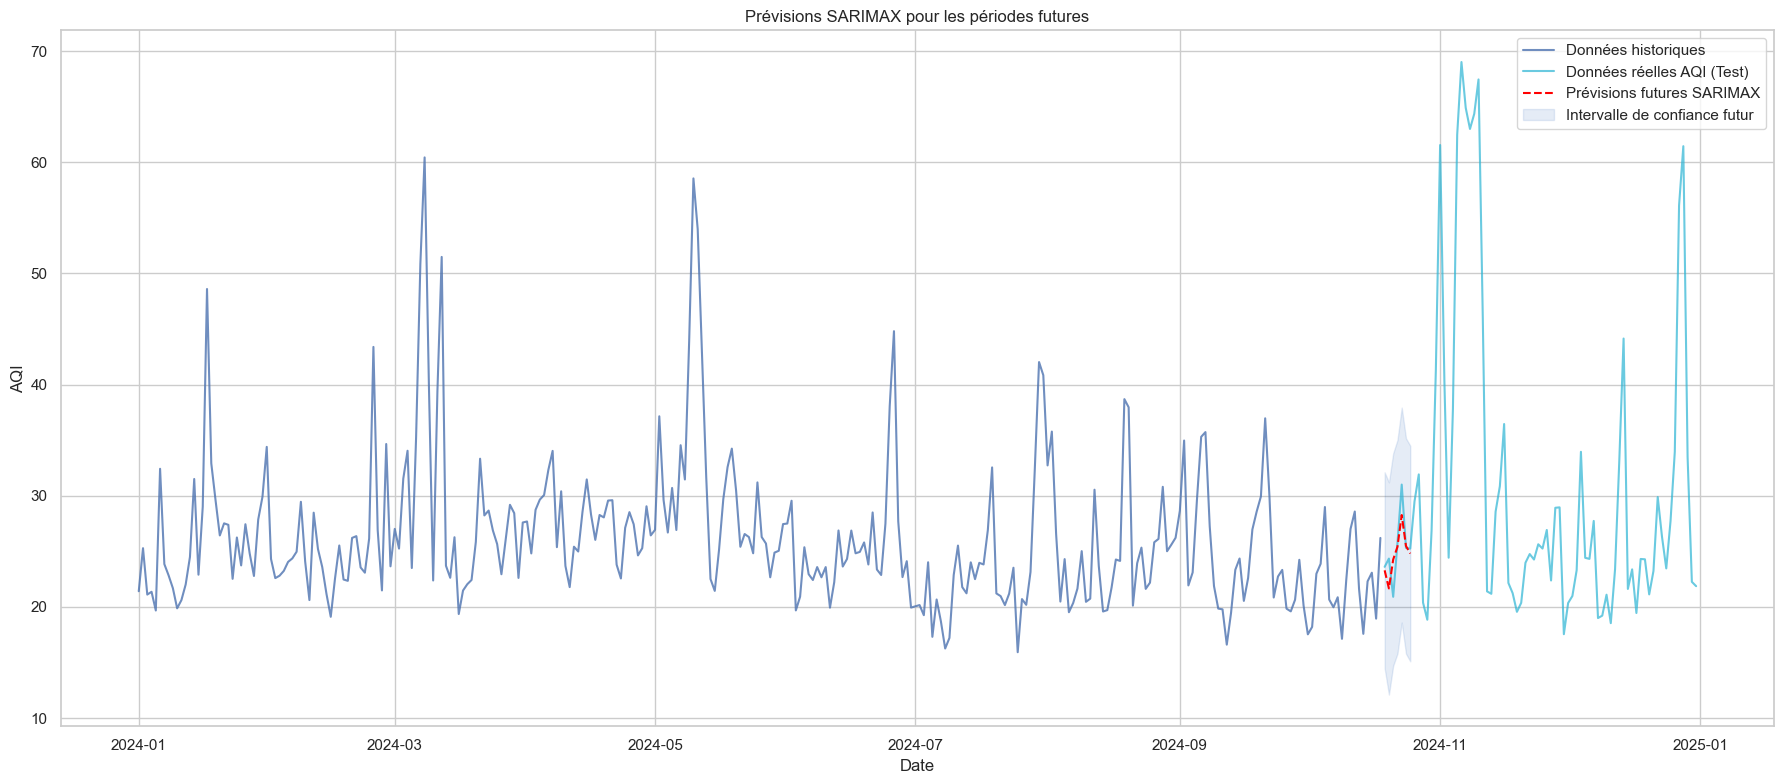

In [168]:
plt.figure(figsize=(18, 8))

plt.plot(train_aqi.index, train_aqi, label='Données historiques', alpha=0.8) # données historiques
plt.plot(test_aqi.index, test_aqi, label='Données réelles AQI (Test)', color=colors[1], alpha=0.7)
plt.plot(future_forecast_mean.index, future_forecast_mean, label='Prévisions futures SARIMAX', color='red',  linestyle='--')

plt.fill_between(future_conf_int.index, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color=colors[0], alpha=0.1, label='Intervalle de confiance futur')
plt.title('Prévisions SARIMAX pour les périodes futures')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [171]:
# Calcul des métriques d'évaluation sur la période de test
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [169]:
if 'future_forecast_mean' in locals() and not future_forecast_mean.empty and len(test_aqi) >= future_periods:
    y_true_forecast_period = test_aqi.iloc[:future_periods]
    y_pred_forecast_period = future_forecast_mean

In [170]:
rmse = np.sqrt(mean_squared_error( y_true_forecast_period, y_pred_forecast_period))
mae = mean_absolute_error( y_true_forecast_period, y_pred_forecast_period)
print(f"\nRMSE prévision future: {rmse:.2f}")
print(f"MAE prévision future: {mae:.2f}")


RMSE prévision future: 1.94
MAE prévision future: 1.43
